In [1]:
#import things to do plots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

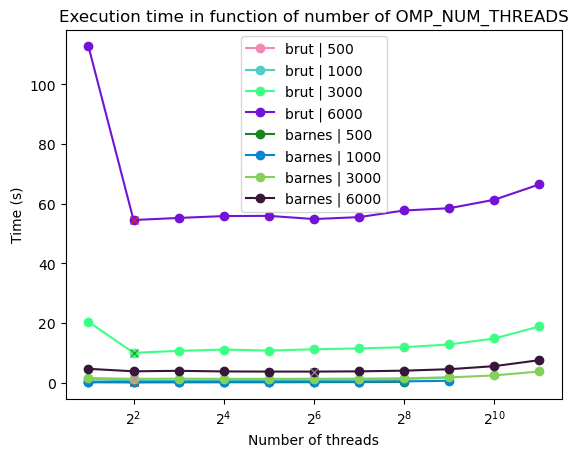

In [2]:
#plot time test in function of number of threads
for data in ['bench_results/omp_brut_eff_results.txt','bench_results/omp_barnes_eff_results.txt']:
    d = pd.read_csv(data, sep=" ", header=None)
    d.columns = ["threads", "particles", "time"]
    for n in [500,1000,3000,6000]:
        d1 = d[d['particles'] == n]
        plt.plot(d1['threads'], d1['time'], 'o-', label=data.split("_")[2]+" | "+str(n),c=np.random.rand(3,))
        plt.plot(d1['threads'][d1['time'].idxmin()], d1['time'].min(), 'x')
        
plt.title('Execution time in function of number of OMP_NUM_THREADS')
plt.xlabel('Number of threads')
#use log2 scale
plt.xscale('log', base=2)
plt.ylabel('Time (s)')
plt.legend()
plt.show()

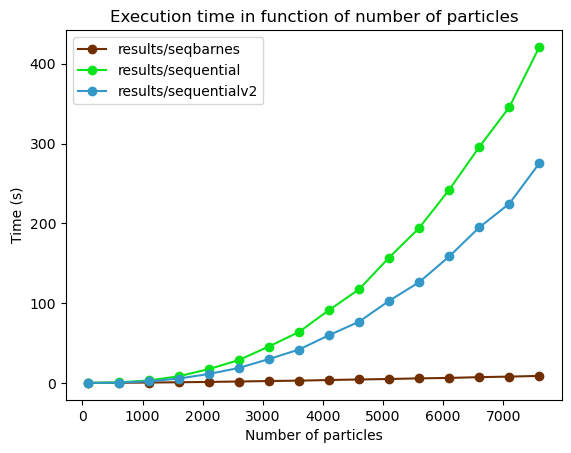

In [3]:
for path in ["bench_results/seqbarnes_results.txt","bench_results/sequential_results.txt","bench_results/sequentialv2_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    plt.plot(d['particles'], d['time'], 'o-', label=exp_name,c=np.random.rand(3,))

plt.title('Execution time in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

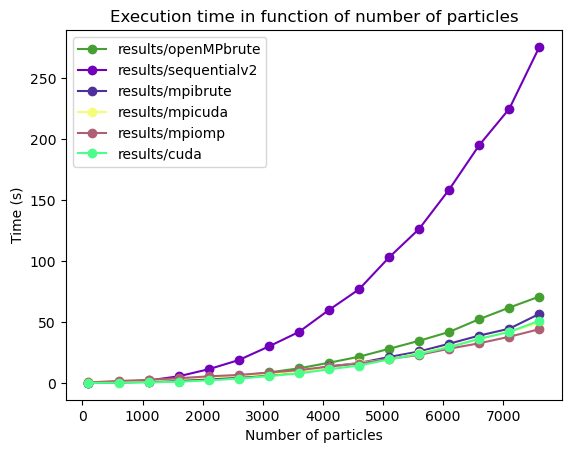

In [29]:
for path in ["bench_results/openMPbrute_results.txt","bench_results/sequentialv2_results.txt","bench_results/mpibrute_results.txt","bench_results/mpicuda_brute_results.txt","bench_results/mpiomp_brute_results.txt","bench_results/cuda_brutev3_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    plt.plot(d['particles'], d['time'], 'o-', label=exp_name,c=np.random.rand(3,))

plt.title('Execution time in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

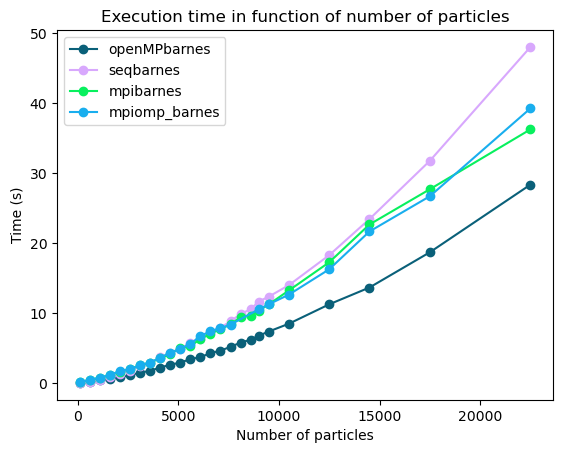

In [34]:
for path in ["bench_results/openMPbarnes_results.txt","bench_results/seqbarnes_results.txt","bench_results/mpibarnes_results.txt","bench_results/mpiomp_barnes_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    plt.plot(d['particles'], d['time'], 'o-', label=exp_name,c=np.random.rand(3,))

plt.title('Execution time in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

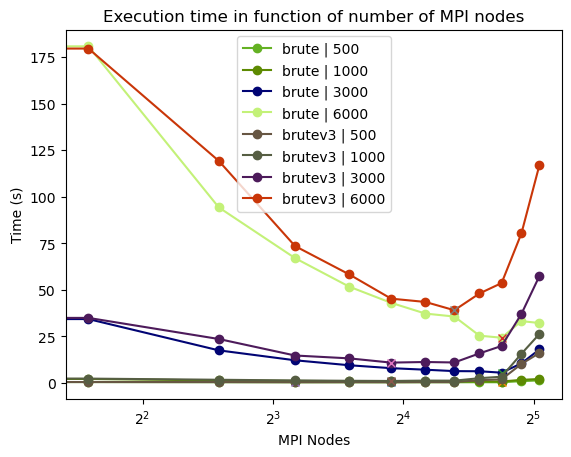

In [6]:
#plot time test in function of number of threads
for data in ['bench_results/mpi_brute_nodes_results.txt', 'bench_results/mpi_brutev3_nodes_results.txt']:
    d = pd.read_csv(data, sep=" ", header=None)
    d.columns = ["nodes", "particles", "time"]
    for n in [500,1000,3000,6000]:
        d1 = d[d['particles'] == n]
        plt.plot(d1['nodes'], d1['time'], 'o-', label=data.split("_")[2]+" | "+str(n),c=np.random.rand(3,))
        plt.plot(d1['nodes'][d1['time'].idxmin()], d1['time'].min(), 'x')
        
plt.title('Execution time in function of number of MPI nodes')
plt.xlabel('MPI Nodes')
#use log2 scale
plt.xscale('log', base=2)
plt.ylabel('Time (s)')
plt.legend()
plt.show()

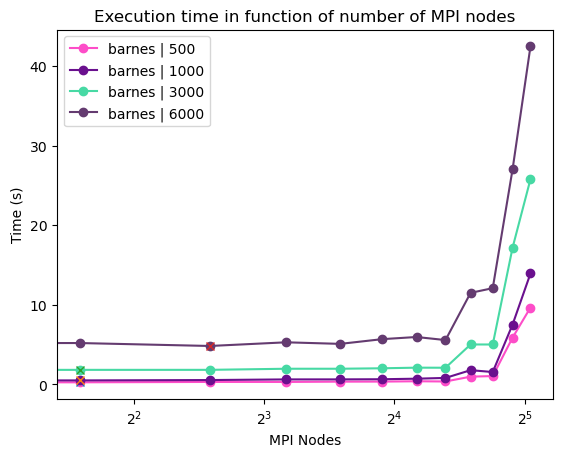

In [7]:
#plot time test in function of number of threads
for data in ['bench_results/mpi_barnes_nodes_results.txt']:
    d = pd.read_csv(data, sep=" ", header=None)
    d.columns = ["nodes", "particles", "time"]
    for n in [500,1000,3000,6000]:
        d1 = d[d['particles'] == n]
        plt.plot(d1['nodes'], d1['time'], 'o-', label=data.split("_")[2]+" | "+str(n),c=np.random.rand(3,))
        plt.plot(d1['nodes'][d1['time'].idxmin()], d1['time'].min(), 'x')
        
plt.title('Execution time in function of number of MPI nodes')
plt.xlabel('MPI Nodes')
#use log2 scale
plt.xscale('log', base=2)
plt.ylabel('Time (s)')
plt.legend()
plt.show()

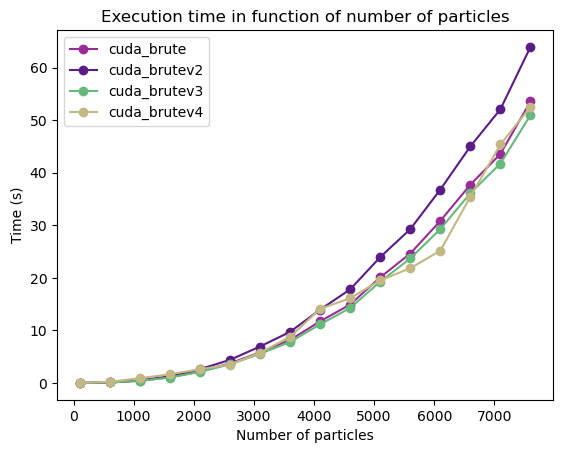

In [33]:
#plot cuda versions
for path in ["bench_results/cuda_brute_results.txt","bench_results/cuda_brutev2_results.txt","bench_results/cuda_brutev3_results.txt","bench_results/cuda_brutev4_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    plt.plot(d['particles'], d['time'], 'o-', label=exp_name,c=np.random.rand(3,))

plt.title('Execution time in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

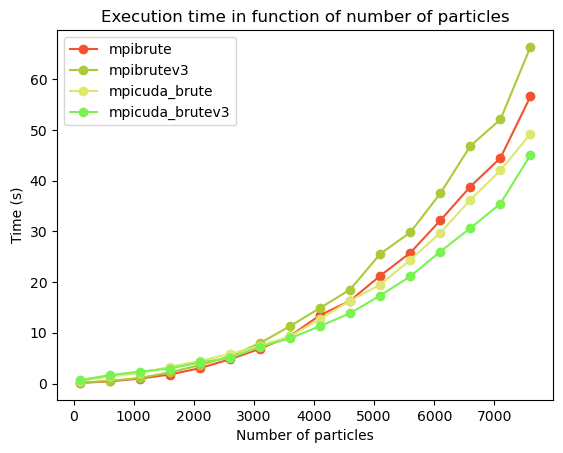

In [13]:
#plot mpi versions
for path in ["bench_results/mpibrute_results.txt","bench_results/mpibrutev3_results.txt","bench_results/mpicuda_brute_results.txt","bench_results/mpicuda_brutev3_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    plt.plot(d['particles'], d['time'], 'o-', label=exp_name,c=np.random.rand(3,))

plt.title('Execution time in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('Time (s)')
plt.legend()

plt.show()

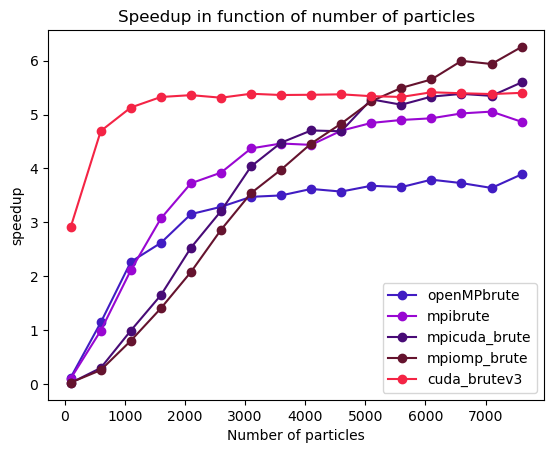

In [32]:
#computing speedups
seq = pd.read_csv("bench_results/sequentialv2_results.txt", sep=" ", header=None)
seq.columns = ["particles", "time"]


for path in ["bench_results/openMPbrute_results.txt","bench_results/mpibrute_results.txt","bench_results/mpicuda_brute_results.txt","bench_results/mpiomp_brute_results.txt","bench_results/cuda_brutev3_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    #compute speedup
    speedup = seq['time']/d['time']
    plt.plot(d['particles'], speedup, 'o-', label=exp_name,c=np.random.rand(3,))
    
plt.title('Speedup in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('speedup')
plt.legend()

plt.show()

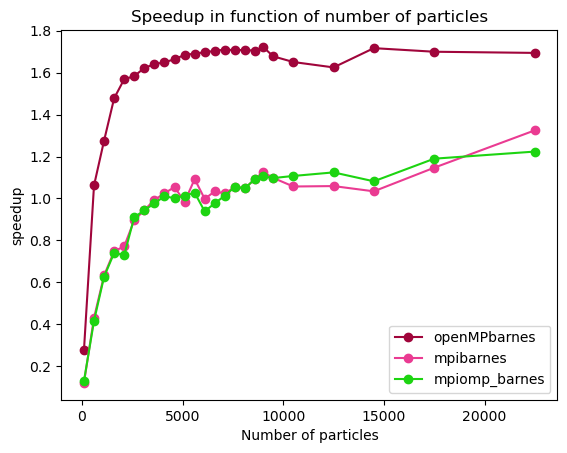

In [37]:
#computing speedups
seq = pd.read_csv("bench_results/seqbarnes_results.txt", sep=" ", header=None)
seq.columns = ["particles", "time"]

for path in ["bench_results/openMPbarnes_results.txt","bench_results/mpibarnes_results.txt","bench_results/mpiomp_barnes_results.txt"]:
    exp_name=path.split("/")[1].split("_results")[0]
    d = pd.read_csv(path, sep=" ", header=None)
    d.columns = ["particles", "time"]
    #compute speedup
    speedup = seq['time']/d['time']
    plt.plot(d['particles'], speedup, 'o-', label=exp_name,c=np.random.rand(3,))
    
plt.title('Speedup in function of number of particles')
plt.xlabel('Number of particles')
plt.ylabel('speedup')
plt.legend()

plt.show()